## Logistic Regression

#### The content is daily weather observations from numerous Australian weather stations.

#### The target RainTomorrow means: Did it rain the next day? Yes or No.

The dataset has the following columns :

* Date - The date of observation
* Location — The common name of the location of the weather station
* MinTemp — The minimum temperature in degrees celsius
* MaxTemp — The maximum temperature in degrees celsius
* Rainfall — The amount of rainfall recorded for the day in mm
* Evaporation — The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine — The number of hours of bright sunshine in the day.
* WindGustDir — The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed — The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am — Direction of the wind at 9am
* WindDir3pm — Direction of the wind at 3pm
* WindSpeed9am — Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm — Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am — Humidity (percent) at 9am
* Humidity3pm — Humidity (percent) at 3pm
* Pressure9am — Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm — Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am — Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear * sky whilst an 8 indicates that it is completely overcast.
* Cloud3pm — Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* Temp9am — Temperature (degrees C) at 9am
* Temp3pm — Temperature (degrees C) at 3pm
* RainToday — Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RISK_MM — The amount of rain. A kind of measure of the "risk".
* RainTomorrow — The target variable. Did it rain tomorrow?

#### Reading and understanding the data

In [1]:
import pandas as pd
import numpy  as np

In [2]:
df = pd.read_csv(r'C:\Users\shubh\Downloads\datasets\weather-dataset-rattle-package/weatherAUS.csv') 

In [3]:
pd.set_option('display.max_columns',24)
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       NaN     16.9     21.8        No      0.0           No  
1       NaN     17.2     24.3        No      0.0           No  
2       2.0     21.0     23.2        No      0.0           No  
3       NaN     18.1     26.5        No      1.0           No  
4       8.0     17.8     29.7        No      0.2           No

In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

#### Checking for the null values.

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

#### Checking for the % of null values in each columns

In [7]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

Date              0.00
Location          0.00
MinTemp           0.45
MaxTemp           0.23
Rainfall          0.99
Evaporation      42.79
Sunshine         47.69
WindGustDir       6.56
WindGustSpeed     6.52
WindDir9am        7.04
WindDir3pm        2.66
WindSpeed9am      0.95
WindSpeed3pm      1.85
Humidity9am       1.25
Humidity3pm       2.54
Pressure9am       9.86
Pressure3pm       9.83
Cloud9am         37.74
Cloud3pm         40.15
Temp9am           0.64
Temp3pm           1.92
RainToday         0.99
RISK_MM           0.00
RainTomorrow      0.00
dtype: float64


In [8]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shubh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shubh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


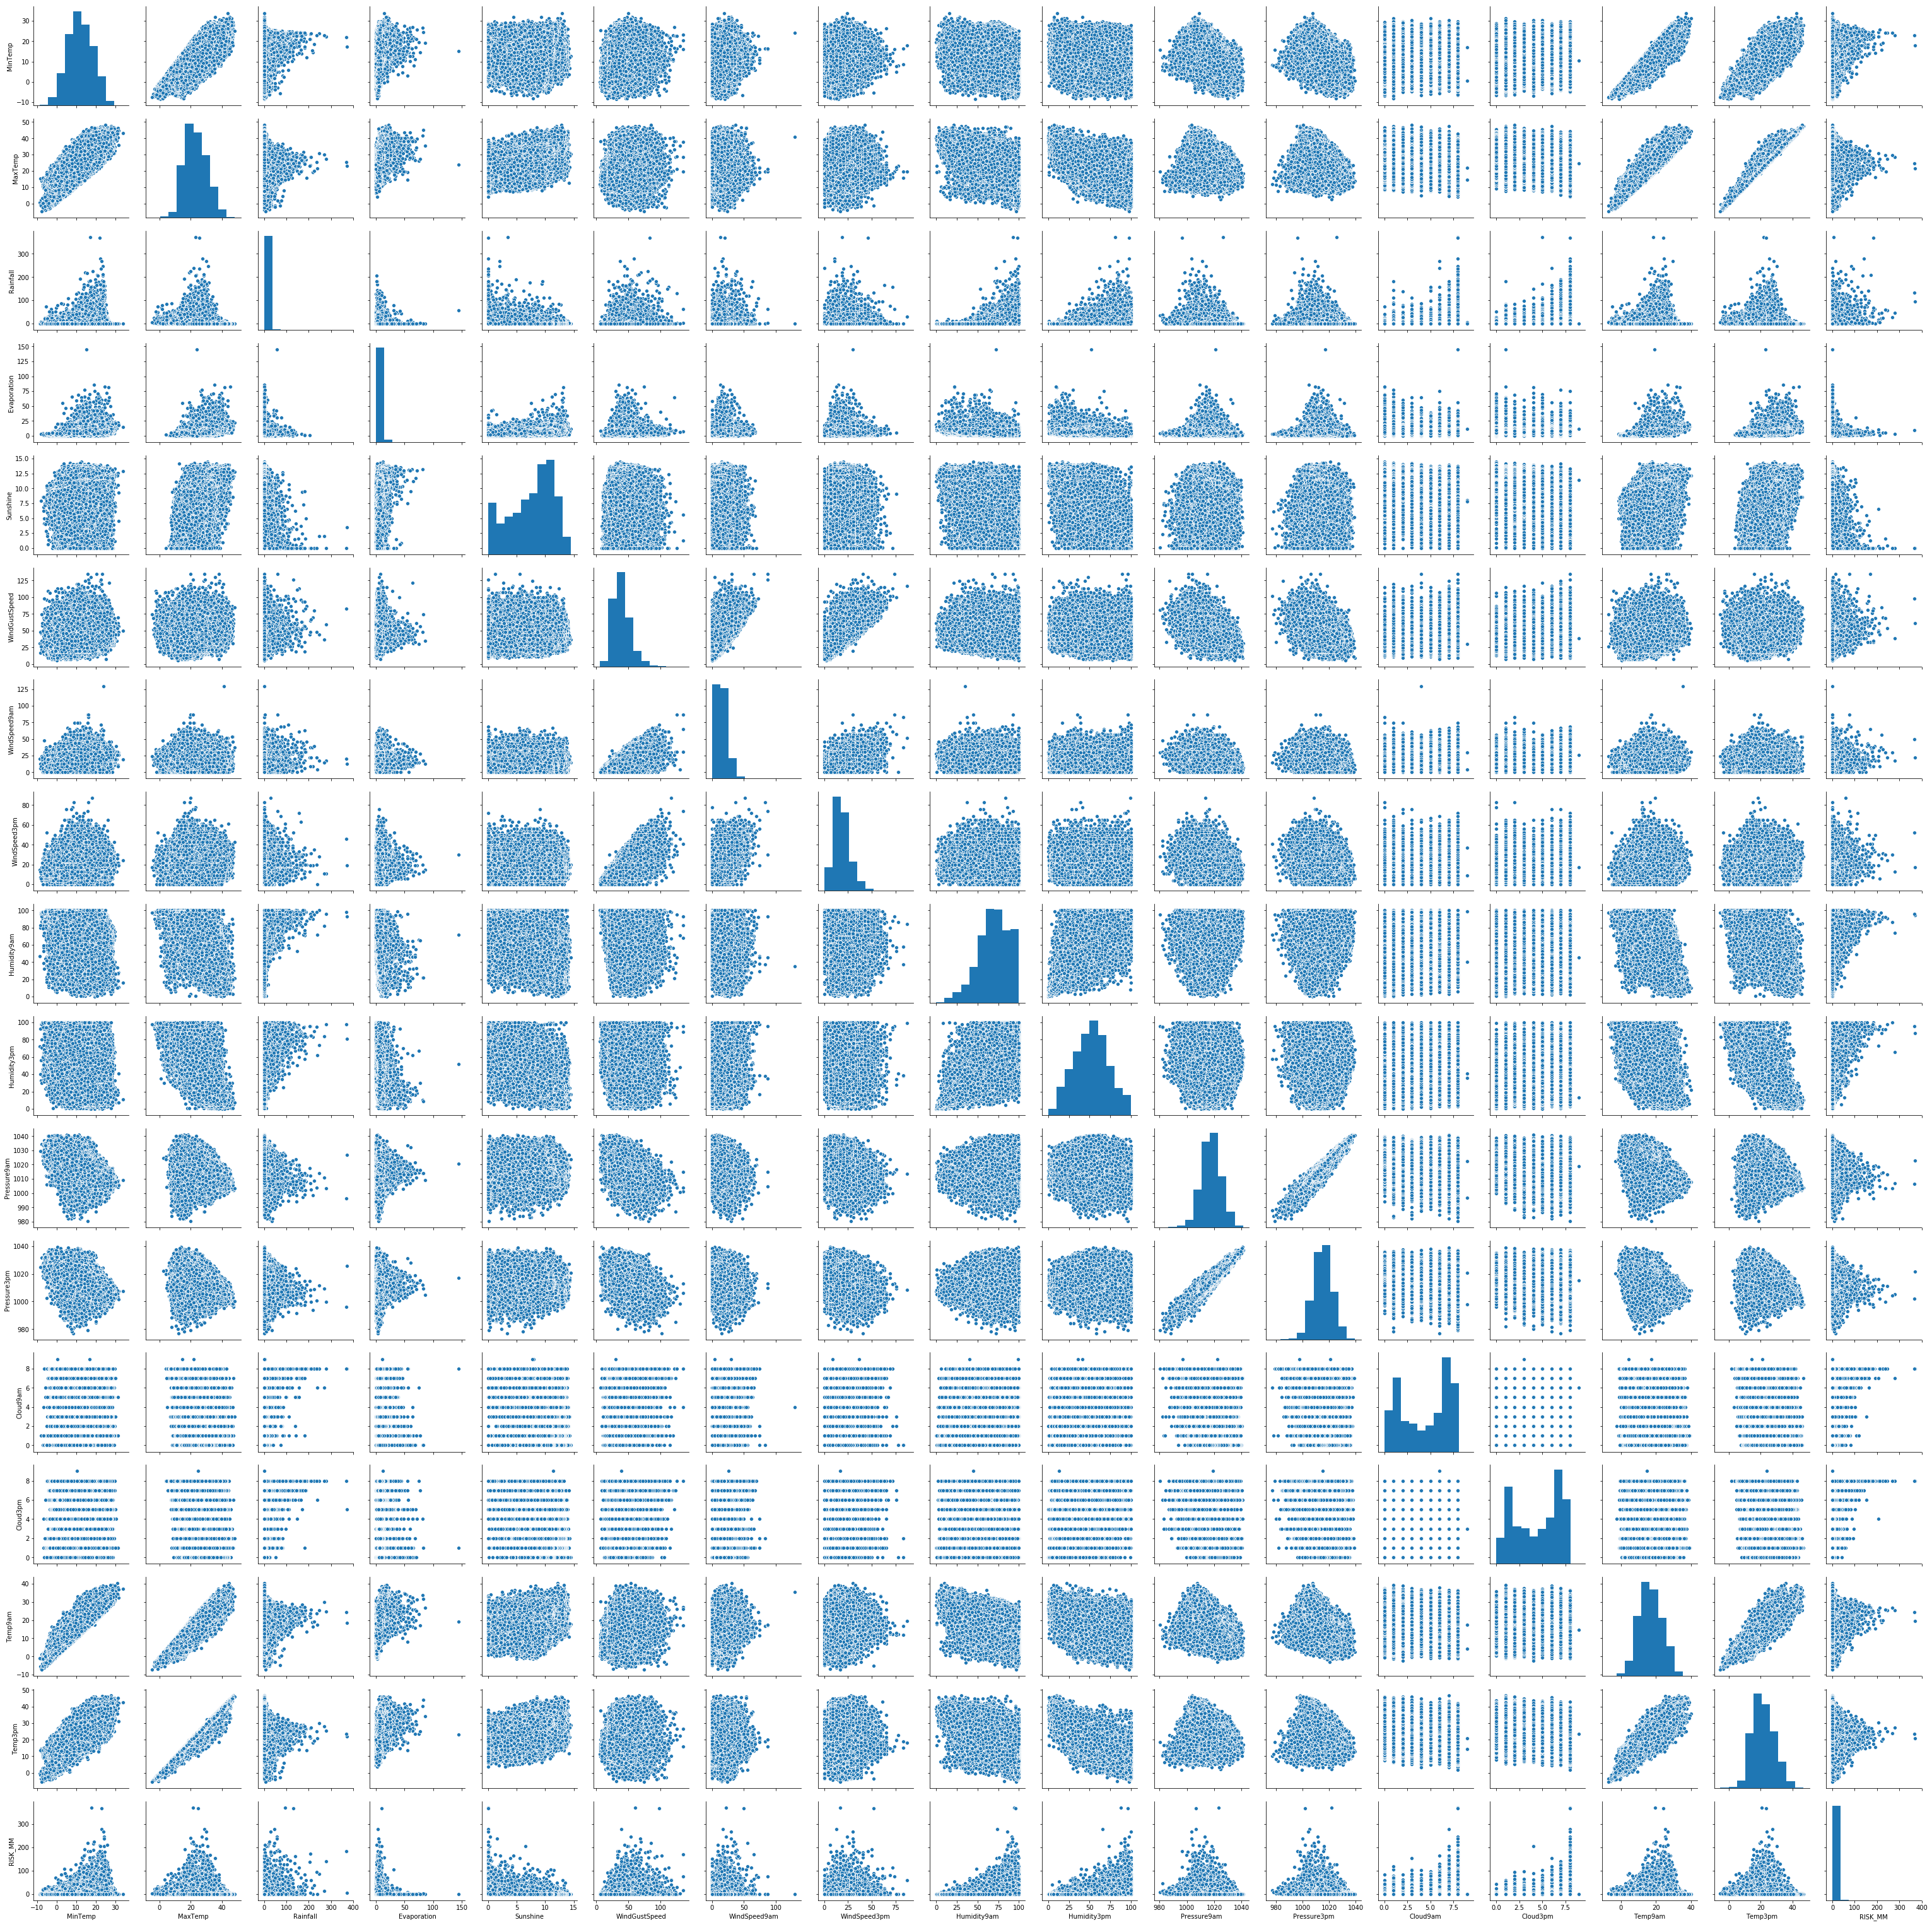

In [9]:
sns.pairplot(df)
plt.show()

We see that `Evaporation`,`Sunshine`,`Cloud9am` and `Cloud3pm` have a considerable amount of missing values so we drop these columns, we also drop `RISK_MM` as it may reduce our predictiblity.


We also dropped `Temp9am`,`Pressure9am`,`WindSpeed9am`,`Humidity9am`,`MaxTemp`,`WindGustSpeed`,`MinTemp`,`Rainfall` since they are highly correlated to their `3pm` counterparts

In [10]:
df = df.drop(columns=['Cloud9am','Cloud3pm', 'Evaporation', 'Sunshine','RISK_MM','Temp9am','Pressure9am','WindSpeed9am','Humidity9am','MaxTemp','WindGustSpeed','MinTemp','Rainfall'])

Dropping all the null values in our data

In [11]:
df= df.dropna()

In [12]:
df.head()

Date Location WindGustDir WindDir9am WindDir3pm  WindSpeed3pm  \
0  2008-12-01   Albury           W          W        WNW          24.0   
1  2008-12-02   Albury         WNW        NNW        WSW          22.0   
2  2008-12-03   Albury         WSW          W        WSW          26.0   
3  2008-12-04   Albury          NE         SE          E           9.0   
4  2008-12-05   Albury           W        ENE         NW          20.0   

   Humidity3pm  Pressure3pm  Temp3pm RainToday RainTomorrow  
0         22.0       1007.1     21.8        No           No  
1         25.0       1007.8     24.3        No           No  
2         30.0       1008.7     23.2        No           No  
3         16.0       1012.8     26.5        No           No  
4         33.0       1006.0     29.7        No           No

In [13]:
df.shape

(113254, 11)

#### Checking for Outliers

In [14]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

WindSpeed3pm    Humidity3pm    Pressure3pm        Temp3pm
count  113254.000000  113254.000000  113254.000000  113254.000000
mean       19.499523      50.689344    1015.049163      22.121944
std         8.581752      20.781385       6.960858       6.839696
min         2.000000       0.000000     977.100000       1.700000
25%        13.000000      36.000000    1010.300000      16.900000
50%        19.000000      51.000000    1015.000000      21.600000
75%        24.000000      65.000000    1019.700000      26.900000
90%        31.000000      78.000000    1024.000000      31.500000
95%        35.000000      86.000000    1026.600000      34.000000
99%        43.000000      96.000000    1031.300000      38.700000
max        87.000000     100.000000    1039.600000      46.700000

From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [15]:
# List of variables to map

varlist =  ['RainToday', 'RainTomorrow']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

#### Visualizing if categorical variables has an impact on  tomorrow's rain to decide if they have to be included on in our model

Let's first visualise the impact of `WindGustDir`,`WindDir9am`,`WindDir3pm` on tommorows rainfall

C:\Users\shubh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


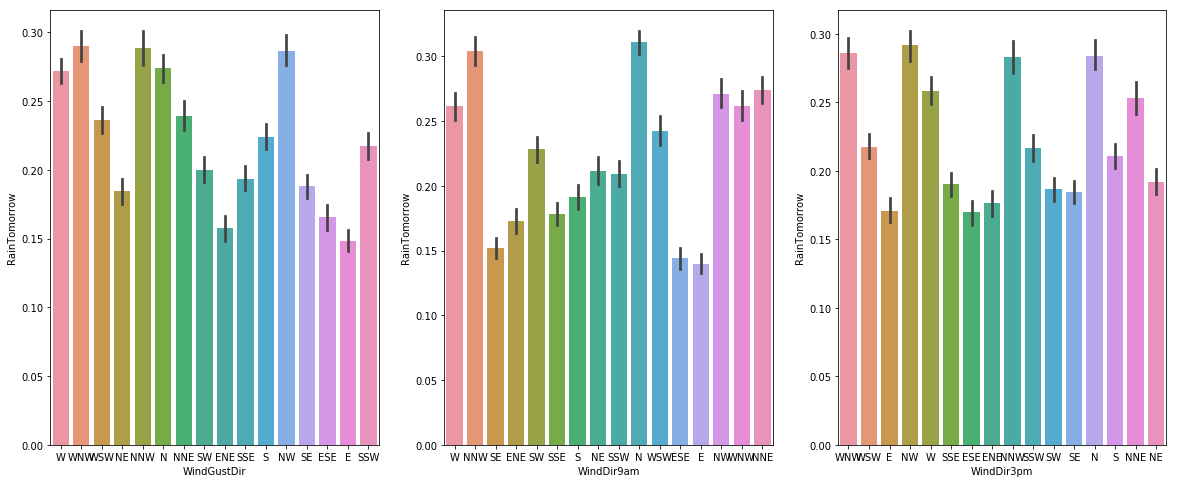

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x='WindGustDir',y='RainTomorrow', data=df)

plt.subplot(1,3,2)
sns.barplot(x='WindDir9am',y='RainTomorrow',data=df)

plt.subplot(1,3,3)
sns.barplot(x='WindDir3pm',y='RainTomorrow',data=df)
plt.show()


These variable do have an impact on tommorow's rainfall and they should be included in our model.

Lets see if the rainfall depends on the `location` 

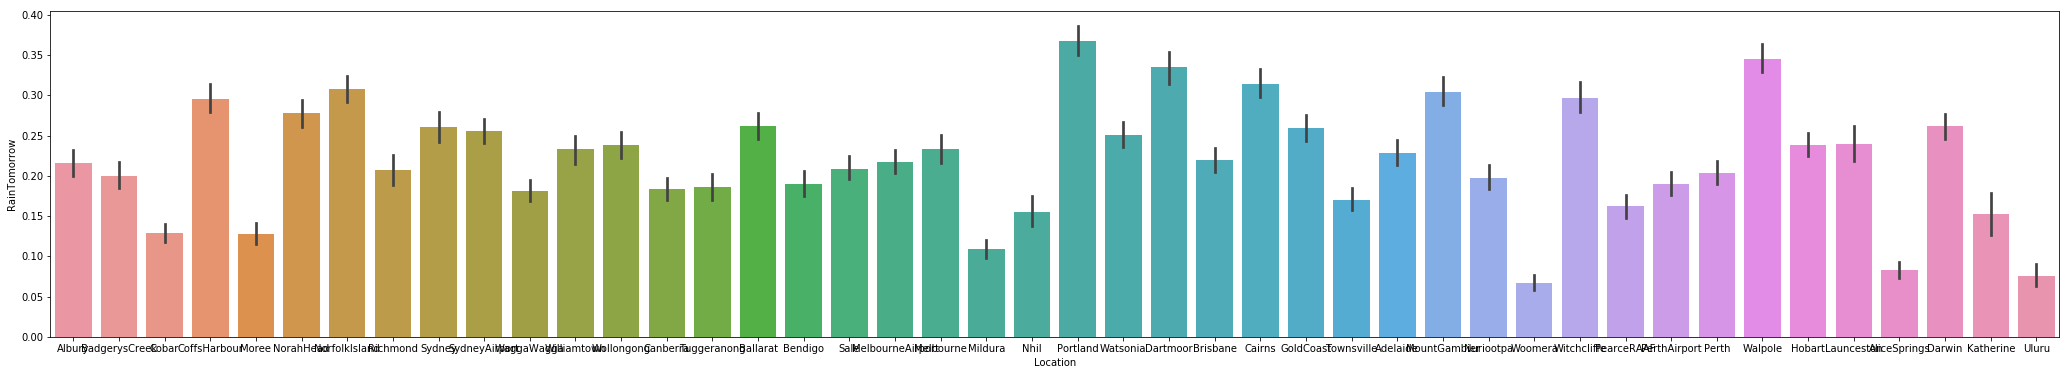

In [17]:
plt.figure(figsize=(36,6))
sns.barplot(x='Location',y='RainTomorrow', data=df)
plt.show()

We see that rainfall also depends on the location, so we also include location in our model.

From our common Knowledge we know that rainfall also depends on the month.

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['month'] = df['Date'].dt.month

In [20]:
df.head()

Date Location WindGustDir WindDir9am WindDir3pm  WindSpeed3pm  \
0 2008-12-01   Albury           W          W        WNW          24.0   
1 2008-12-02   Albury         WNW        NNW        WSW          22.0   
2 2008-12-03   Albury         WSW          W        WSW          26.0   
3 2008-12-04   Albury          NE         SE          E           9.0   
4 2008-12-05   Albury           W        ENE         NW          20.0   

   Humidity3pm  Pressure3pm  Temp3pm  RainToday  RainTomorrow  month  
0         22.0       1007.1     21.8          0             0     12  
1         25.0       1007.8     24.3          0             0     12  
2         30.0       1008.7     23.2          0             0     12  
3         16.0       1012.8     26.5          0             0     12  
4         33.0       1006.0     29.7          0             0     12

Creating a function to classify different months into seasons.

In [21]:
def fun(x):
    if x in (3,4,5):
        return 'Autumn'
    elif x in (6,7,8):
        return 'Winter'
    elif x in (9,10,11):
        return 'Spring'
    else:
        return 'Summer'
    
df['Season']= df['month'].apply(fun)

In [22]:
df.drop(columns=['Date','month'], inplace=True)
df.head()

Location WindGustDir WindDir9am WindDir3pm  WindSpeed3pm  Humidity3pm  \
0   Albury           W          W        WNW          24.0         22.0   
1   Albury         WNW        NNW        WSW          22.0         25.0   
2   Albury         WSW          W        WSW          26.0         30.0   
3   Albury          NE         SE          E           9.0         16.0   
4   Albury           W        ENE         NW          20.0         33.0   

   Pressure3pm  Temp3pm  RainToday  RainTomorrow  Season  
0       1007.1     21.8          0             0  Summer  
1       1007.8     24.3          0             0  Summer  
2       1008.7     23.2          0             0  Summer  
3       1012.8     26.5          0             0  Summer  
4       1006.0     29.7          0             0  Summer

#### For categorical variables with multiple levels, create dummy.

In [23]:
df = pd.get_dummies(data= df, columns= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','Season'], drop_first=True)

In [24]:
df.head()

WindSpeed3pm  Humidity3pm  Pressure3pm  Temp3pm  RainToday  RainTomorrow  \
0          24.0         22.0       1007.1     21.8          0             0   
1          22.0         25.0       1007.8     24.3          0             0   
2          26.0         30.0       1008.7     23.2          0             0   
3           9.0         16.0       1012.8     26.5          0             0   
4          20.0         33.0       1006.0     29.7          0             0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0                1                      0                       0   
1                1                      0                       0   
2                1                      0                       0   
3                1                      0                       0   
4                1                      0                       0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane      ...        \
0                  0                 0                  0      ...         
1                  0                 0                  0      ...         
2                  0                 0                  0      ...         
3                  0                 0                  0      ...         
4                  0                 0                  0      ...         

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0              0             0              0               0               0   
1              0             0              0               0               0   
2              0             0              0               0               0   
3              0             0              0               0               0   
4              1             0              0               0               0   

   WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  Season_Spring  \
0              0             0               1               0              0   
1              0             0               0               1              0   
2              0             0               0               1              0   
3              0             0               0               0              0   
4              0             0               0               0              0   

   Season_Summer  Season_Winter  
0              1              0  
1              1              0  
2              1              0  
3              1              0  
4              1              0  

[5 rows x 97 columns]

### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['RainTomorrow'],axis=1)

In [27]:
y = df['RainTomorrow']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [28]:
X_train, X_test, y_train, y_test,= train_test_split(X,y, train_size= 0.7, test_size= 0.3, random_state= 100)

### Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [30]:
list_=['WindSpeed3pm','Humidity3pm','Pressure3pm','Temp3pm']

X_train[list_] = scaler.fit_transform(X_train[list_])

X_train.head()

C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


WindSpeed3pm  Humidity3pm  Pressure3pm   Temp3pm  RainToday  \
76886      0.176471         0.47       0.6672  0.415556          0   
59534      0.082353         0.30       0.5408  0.515556          0   
98613      0.023529         0.60       0.5200  0.362222          0   
40745      0.411765         0.50       0.6064  0.406667          1   
14455      0.105882         0.43       0.6240  0.388889          0   

       Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
76886                0                      0                       0   
59534                0                      0                       0   
98613                0                      0                       0   
40745                0                      0                       0   
14455                0                      0                       0   

       Location_Ballarat  Location_Bendigo  Location_Brisbane  \
76886                  0                 0                  0   
59534                  0                 1                  0   
98613                  0                 0                  0   
40745                  0                 0                  0   
14455                  0                 0                  0   

       Location_Cairns      ...        WindDir3pm_NW  WindDir3pm_S  \
76886                0      ...                    0             0   
59534                0      ...                    0             1   
98613                0      ...                    0             0   
40745                0      ...                    0             0   
14455                0      ...                    1             0   

       WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
76886              0               0               0              1   
59534              0               0               0              0   
98613              0               0               0              0   
40745              0               0               0              0   
14455              0               0               0              0   

       WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  Season_Spring  \
76886             0               0               0              0   
59534             0               0               0              0   
98613             0               0               0              1   
40745             0               1               0              0   
14455             0               0               0              1   

       Season_Summer  Season_Winter  
76886              0              0  
59534              1              0  
98613              0              0  
40745              0              1  
14455              0              0  

[5 rows x 96 columns]

In [31]:
### Checking the % of day having when it rained tommorow
rain_tommorow = (sum(df['RainTomorrow'])/len(df['RainTomorrow'].index))*100
rain_tommorow

22.169636392533597

###  Looking at Correlations

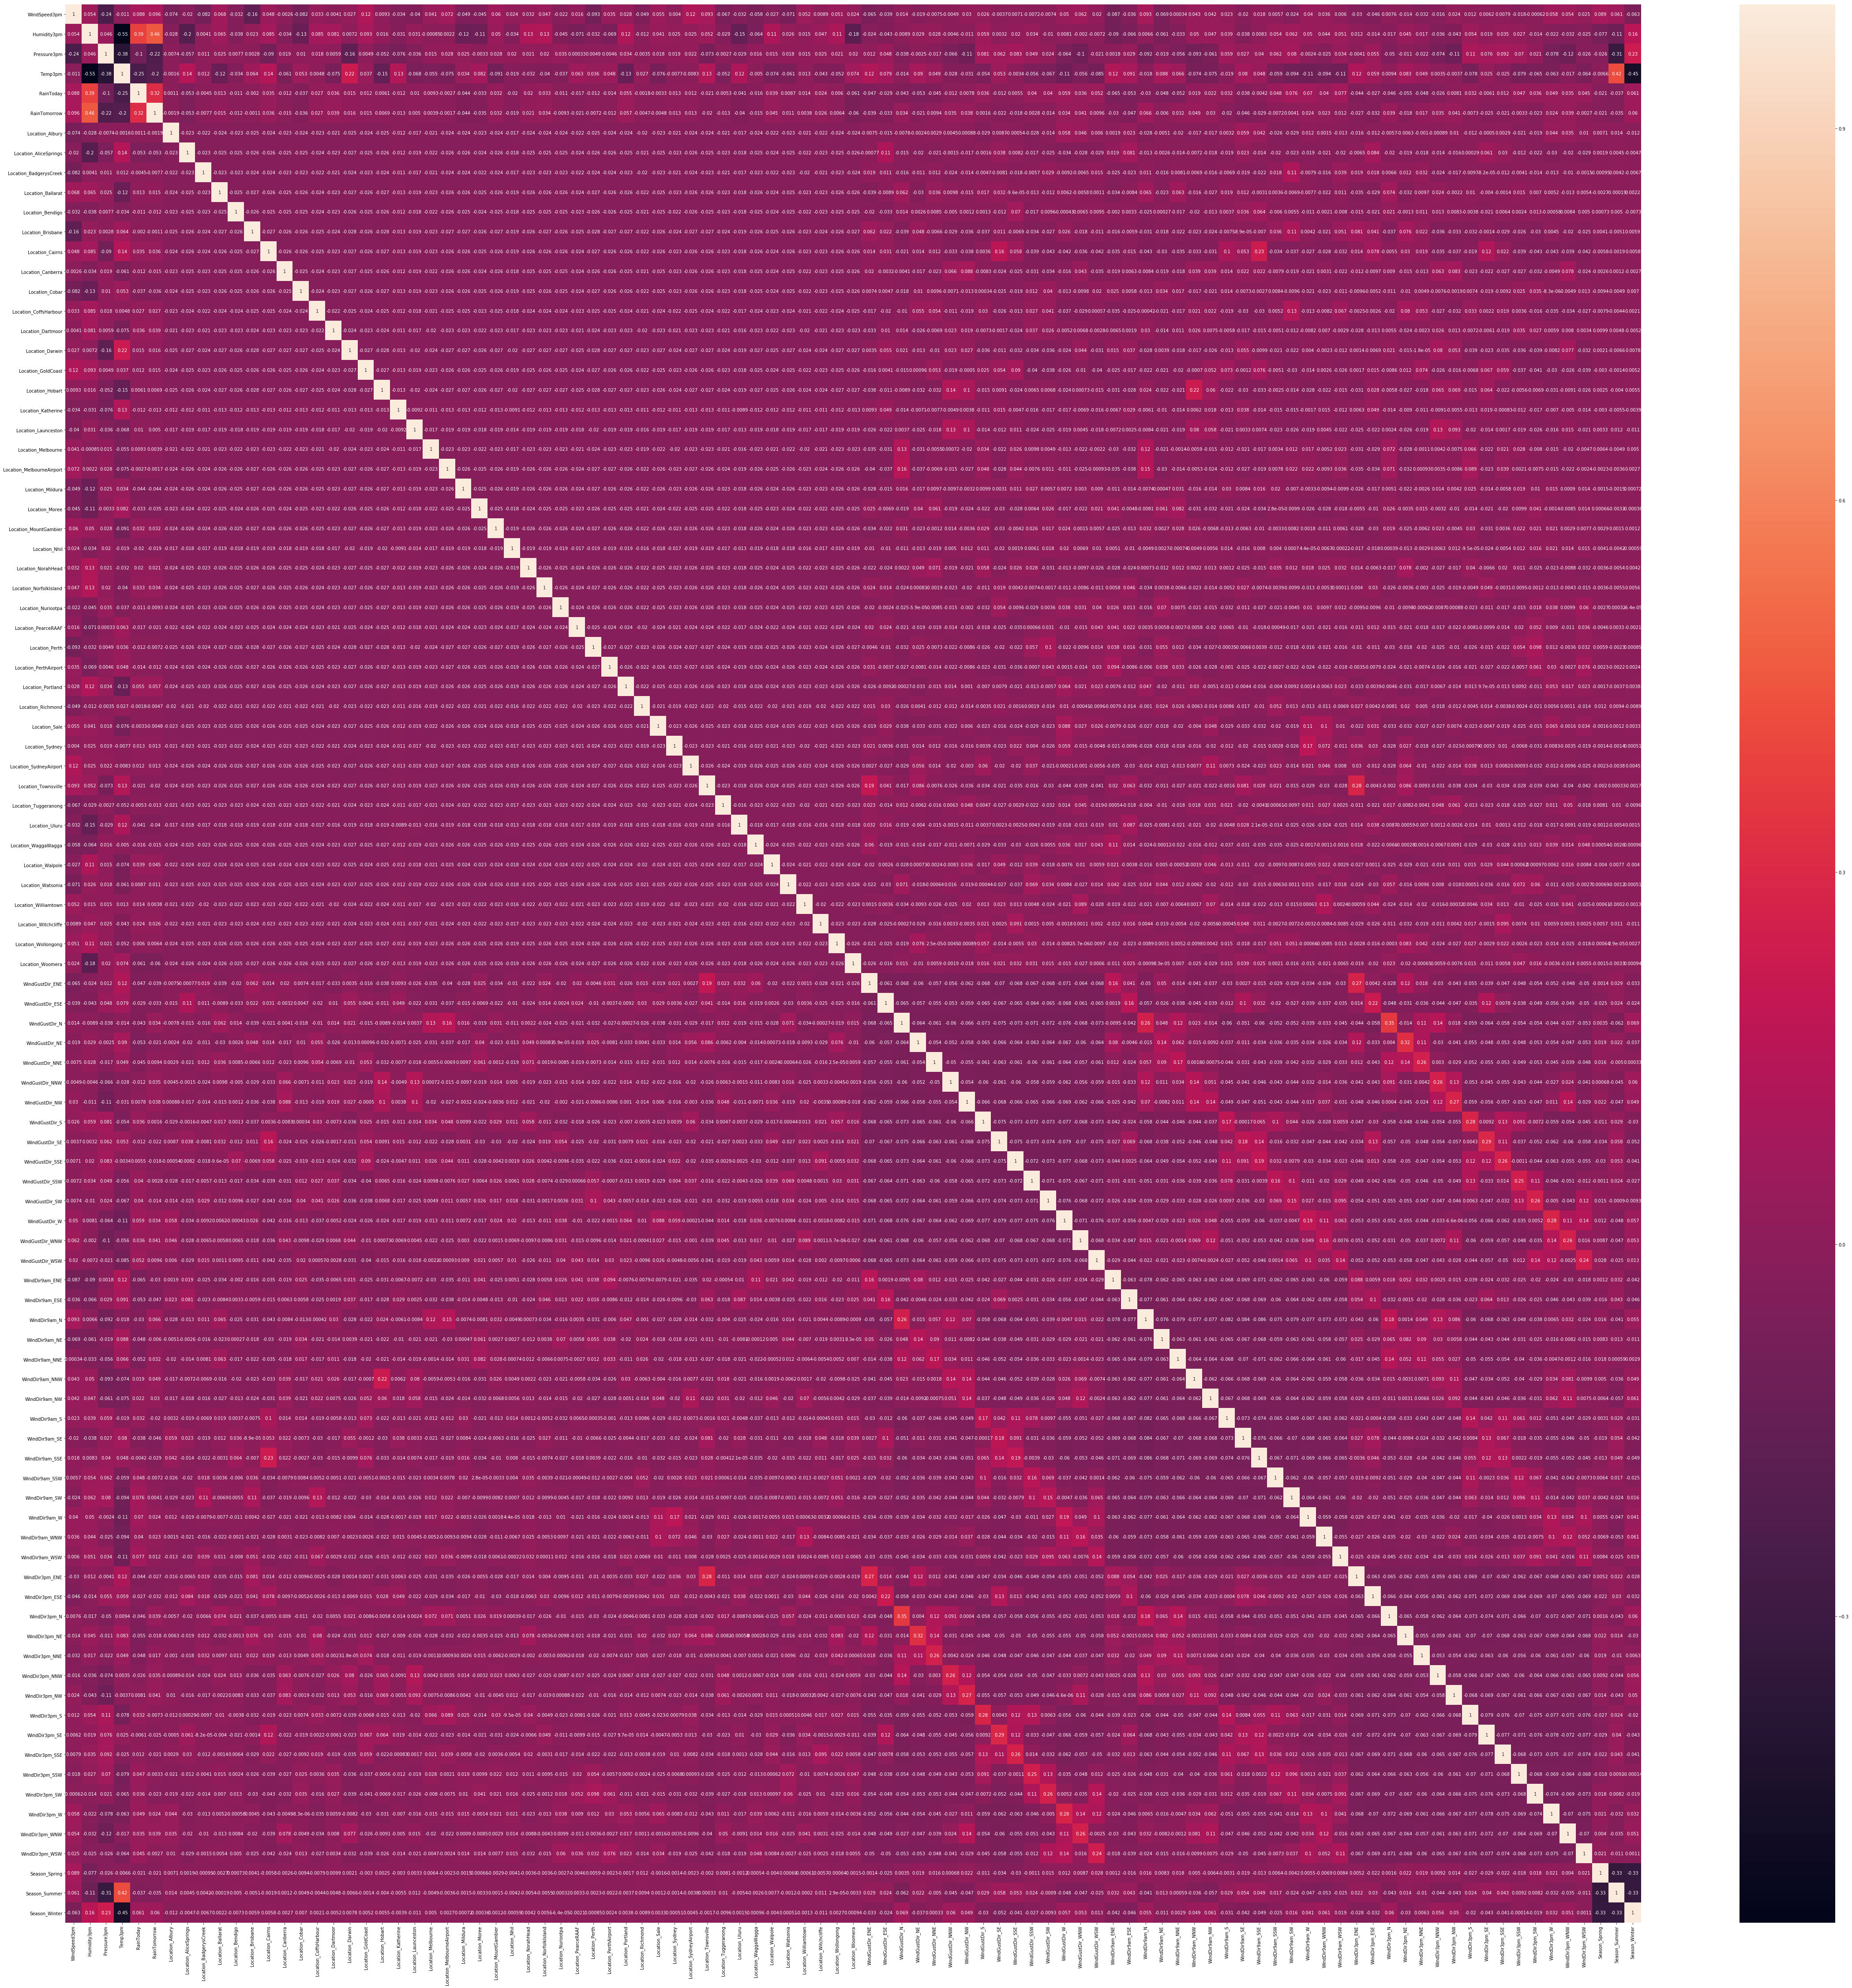

In [32]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,80))
sns.heatmap(df.corr(),annot =True)
plt.show()

We see that there is no high correlation between any of the independent variables

###  Model Building
#### Running Your First Training Model

In [33]:
import statsmodels.api as sm

In [34]:
# Logistic regression model
X_train_sm= sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                79277
Model:                            GLM   Df Residuals:                    79180
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28443.
Date:                Sun, 14 Jul 2019   Deviance:                       56886.
Time:                        13:12:17   Pearson chi2:                 7.75e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.9556      0.183    -10.695      0.000      -2.314      -1.597
WindSpeed3pm                  1.8622      0.118     15.731      0.000       1.630       2.094
Humidity3pm                   7.4930      0.091     82.683      0.000       7.315       7.671
Pressure3pm                  -6.1873      0.125    -49.373      0.000      -6.433      -5.942
Temp3pm                       0.5303      0.167      3.181      0.001       0.204       0.857
RainToday                     0.6274      0.024     26.171      0.000       0.580       0.674
Location_Albury              -0.3570      0.104     -3.423      0.001      -0.561      -0.153
Location_AliceSprings        -0.4201      0.132     -3.178      0.001      -0.679      -0.161
Location_BadgerysCreek       -0.6765      0.104     -6.494      0.000      -0.881      -0.472
Location_Ballarat            -1.1775      0.100    -11.807      0.000      -1.373      -0.982
Location_Bendigo             -0.5475      0.105     -5.217      0.000      -0.753      -0.342
Location_Brisbane            -0.4499      0.098     -4.599      0.000      -0.642      -0.258
Location_Cairns              -1.0245      0.101    -10.151      0.000      -1.222      -0.827
Location_Canberra            -0.6787      0.105     -6.487      0.000      -0.884      -0.474
Location_Cobar               -0.2185      0.113     -1.931      0.054      -0.440       0.003
Location_CoffsHarbour        -0.7798      0.097     -8.018      0.000      -0.970      -0.589
Location_Dartmoor            -0.8545      0.099     -8.637      0.000      -1.048      -0.661
Location_Darwin              -1.4375      0.102    -14.097      0.000      -1.637      -1.238
Location_GoldCoast           -1.2317      0.100    -12.287      0.000      -1.428      -1.035
Location_Hobart              -0.8147      0.097     -8.438      0.000      -1.004      -0.625
Location_Katherine           -1.5657      0.188     -8.339      0.000      -1.934      -1.198
Location_Launceston          -1.4664      0.121    -12.100      0.000      -1.704      -1.229
Location_Melbourne           -0.5069      0.102     -4.973      0.000      -0.707      -0.307
Location_MelbourneAirport    -0.6729      0.099     -6.823      0.000      -0.866      -0.480
Location_Mildura             -0.3609      0.112     -3.237      0.001      -0.579      -0.142
Location_Moree               -0.3962      0.115     -3.450      0.001      -0.621      -0.171
Location_MountGambier        -0.5507      0.094     -5.858      0.000      -0.735      -0.366
Location_Nhil                -0.9804      0.132     -7.434      0.000      -1.239      -0.722
Location_NorahHead           -1.1735      0.096    -12.271      0.000      -1.361      -0.986
Location_NorfolkIsland       -1.1233      0.094    -11.984      0.000      -1.307      -0.940
Location_Nuriootpa           -0.4950      0.103     -4.825  

#### Feature Selection Using RFE

In [35]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()

In [36]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg,15)
rfe= rfe.fit(X_train, y_train)

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [38]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                79277
Model:                            GLM   Df Residuals:                    79261
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29012.
Date:                Sun, 14 Jul 2019   Deviance:                       58023.
Time:                        13:13:05   Pearson chi2:                 7.83e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3184      0.079    -29.347      0.000      -2.473      -2.164
WindSpeed3pm            1.4373      0.105     13.674      0.000       1.231       1.643
Humidity3pm             6.9828      0.069    101.670      0.000       6.848       7.117
Pressure3pm            -5.7642      0.105    -55.109      0.000      -5.969      -5.559
RainToday               0.6601      0.023     28.868      0.000       0.615       0.705
Location_Ballarat      -0.5307      0.068     -7.806      0.000      -0.664      -0.397
Location_Darwin        -0.6726      0.062    -10.913      0.000      -0.793      -0.552
Location_GoldCoast     -0.5855      0.063     -9.305      0.000      -0.709      -0.462
Location_Katherine     -0.8956      0.169     -5.307      0.000      -1.226      -0.565
Location_Launceston    -0.9664      0.095    -10.124      0.000      -1.154      -0.779
Location_NorahHead     -0.5743      0.060     -9.632      0.000      -0.691      -0.457
Location_Townsville    -1.0676      0.068    -15.607      0.000      -1.202      -0.934
Location_Wollongong    -0.8053      0.063    -12.715      0.000      -0.929      -0.681
WindDir3pm_N            0.6117      0.042     14.558      0.000       0.529       0.694
WindDir3pm_NNW          0.7349      0.046     15.838      0.000       0.644       0.826
WindDir3pm_NW           0.5606      0.045     12.578      0.000       0.473       0.648
=======================================================================================
"""

#### Checking VIFs

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1           Humidity3pm  8.17
2           Pressure3pm  8.02
0          WindSpeed3pm  4.42
3             RainToday  1.57
13       WindDir3pm_NNW  1.09
12         WindDir3pm_N  1.08
14        WindDir3pm_NW  1.08
6    Location_GoldCoast  1.06
10  Location_Townsville  1.06
4     Location_Ballarat  1.05
5       Location_Darwin  1.05
8   Location_Launceston  1.05
9    Location_NorahHead  1.05
11  Location_Wollongong  1.05
7    Location_Katherine  1.01

Since the VIF value of `Humidity3pm` is above 5 we drop and re-run the model

In [40]:
col = col.drop('Humidity3pm', 1)

In [41]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                79277
Model:                            GLM   Df Residuals:                    79262
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36270.
Date:                Sun, 14 Jul 2019   Deviance:                       72540.
Time:                        13:13:08   Pearson chi2:                 7.90e+04
No. Iterations:                     5   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8118      0.063     12.934      0.000       0.689       0.935
WindSpeed3pm            0.6958      0.093      7.490      0.000       0.514       0.878
Pressure3pm            -4.6589      0.092    -50.625      0.000      -4.839      -4.479
RainToday               1.5639      0.020     79.585      0.000       1.525       1.602
Location_Ballarat       0.1720      0.057      3.009      0.003       0.060       0.284
Location_Darwin        -0.3276      0.055     -5.960      0.000      -0.435      -0.220
Location_GoldCoast      0.1725      0.058      2.983      0.003       0.059       0.286
Location_Katherine     -0.8664      0.140     -6.193      0.000      -1.141      -0.592
Location_Launceston    -0.3977      0.084     -4.726      0.000      -0.563      -0.233
Location_NorahHead      0.4005      0.055      7.261      0.000       0.292       0.509
Location_Townsville    -0.4992      0.064     -7.754      0.000      -0.625      -0.373
Location_Wollongong     0.1142      0.059      1.930      0.054      -0.002       0.230
WindDir3pm_N            0.4911      0.036     13.772      0.000       0.421       0.561
WindDir3pm_NNW          0.4296      0.039     10.901      0.000       0.352       0.507
WindDir3pm_NW           0.2334      0.038      6.072      0.000       0.158       0.309
=======================================================================================
"""

We see that the `p-value` for `Location_Wollongong` has increased so lets drop it an re-run the model

In [42]:
col = col.drop('Location_Wollongong', 1)

In [43]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                79277
Model:                            GLM   Df Residuals:                    79263
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36272.
Date:                Sun, 14 Jul 2019   Deviance:                       72543.
Time:                        13:13:09   Pearson chi2:                 7.90e+04
No. Iterations:                     5   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8106      0.063     12.912      0.000       0.688       0.934
WindSpeed3pm            0.7061      0.093      7.612      0.000       0.524       0.888
Pressure3pm            -4.6544      0.092    -50.590      0.000      -4.835      -4.474
RainToday               1.5640      0.020     79.587      0.000       1.525       1.603
Location_Ballarat       0.1682      0.057      2.943      0.003       0.056       0.280
Location_Darwin        -0.3303      0.055     -6.012      0.000      -0.438      -0.223
Location_GoldCoast      0.1681      0.058      2.910      0.004       0.055       0.281
Location_Katherine     -0.8688      0.140     -6.211      0.000      -1.143      -0.595
Location_Launceston    -0.3997      0.084     -4.751      0.000      -0.565      -0.235
Location_NorahHead      0.3966      0.055      7.196      0.000       0.289       0.505
Location_Townsville    -0.5031      0.064     -7.817      0.000      -0.629      -0.377
WindDir3pm_N            0.4910      0.036     13.769      0.000       0.421       0.561
WindDir3pm_NNW          0.4280      0.039     10.865      0.000       0.351       0.505
WindDir3pm_NW           0.2315      0.038      6.025      0.000       0.156       0.307
=======================================================================================
"""

In [44]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0          WindSpeed3pm  4.29
1           Pressure3pm  4.10
2             RainToday  1.29
11       WindDir3pm_NNW  1.09
10         WindDir3pm_N  1.08
12        WindDir3pm_NW  1.08
5    Location_GoldCoast  1.05
7   Location_Launceston  1.05
3     Location_Ballarat  1.04
4       Location_Darwin  1.04
9   Location_Townsville  1.04
8    Location_NorahHead  1.03
6    Location_Katherine  1.00

##### Now that our `p-values` and the `VIF's` are within the permisiable limit we can predict using our model.

In [45]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [46]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10245453, 0.16132753, 0.16894696, 0.46080769, 0.14338289,
       0.16327586, 0.10266482, 0.15904758, 0.11802594, 0.10096363])

##### Creating a dataframe with the actual rainfall_tommorow and the predicted probabilities

In [47]:
y_train_pred_final = pd.DataFrame({'rainfall_tommorow':y_train.values, 'rainfall_Prob':y_train_pred})
y_train_pred_final.head()

rainfall_tommorow  rainfall_Prob
0                  0       0.102455
1                  0       0.161328
2                  0       0.168947
3                  0       0.460808
4                  1       0.143383

In [48]:
# Creating new column 'predicted' with 1 if rainfall_Prob > 0.5 else 0
# This is an randomly chosen cut-off the actual cut-off is calculated a few steps later 
y_train_pred_final['predicted'] = y_train_pred_final.rainfall_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

rainfall_tommorow  rainfall_Prob  predicted
0                  0       0.102455          0
1                  0       0.161328          0
2                  0       0.168947          0
3                  0       0.460808          0
4                  1       0.143383          0

In [49]:
from sklearn import metrics

### Confusion matrix 

In [50]:
confusion = metrics.confusion_matrix(y_train_pred_final.rainfall_tommorow, y_train_pred_final.predicted )
print(confusion)

[[58926  2884]
 [13203  4264]]


In [51]:
# Predicted     no_rainfall  rainfall
# Actual
# no_rainfall        58926     2884
# rainfall           13203     4264

In [52]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.rainfall_tommorow, y_train_pred_final.predicted))

0.7970785978278694


### Metrics beyond simply accuracy

In [53]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity

In [54]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.2441174786740711

### Specificity

In [55]:
# Let us calculate specificity
TN / float(TN+FP)

0.9533408833522083

##### We see that our model can predict the probablity of not having a rainfall tommorow with high level of accuracy as it's specificity is high but our model is not able to predict correctly when it rains tommorow as its sensitivity is low.

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [56]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.rainfall_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

rainfall_tommorow  rainfall_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0       0.102455          0    1    1    0    0    0    0   
1                  0       0.161328          0    1    1    0    0    0    0   
2                  0       0.168947          0    1    1    0    0    0    0   
3                  0       0.460808          0    1    1    1    1    1    0   
4                  1       0.143383          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [57]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.rainfall_tommorow, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.220329  1.000000  0.000000
0.1   0.1  0.396092  0.928436  0.245656
0.2   0.2  0.699434  0.665541  0.709011
0.3   0.3  0.768722  0.497624  0.845332
0.4   0.4  0.788665  0.369840  0.907022
0.5   0.5  0.797079  0.244117  0.953341
0.6   0.6  0.791478  0.113357  0.983110
0.7   0.7  0.785297  0.042480  0.995211
0.8   0.8  0.781286  0.010133  0.999207
0.9   0.9  0.779823  0.000744  0.999984


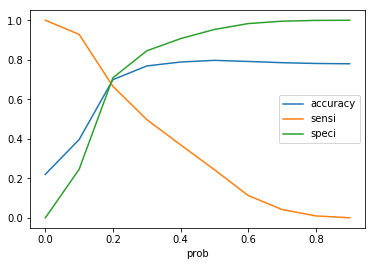

In [58]:
##### So we see that the optimal cutoff point is 0.19
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [59]:
y_train_pred_final['final_predicted'] = y_train_pred_final.rainfall_Prob.map(lambda x: 1 if x > 0.19 else 0)
y_train_pred_final.head()

rainfall_tommorow  rainfall_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                  0       0.102455          0    1    1    0    0    0    0   
1                  0       0.161328          0    1    1    0    0    0    0   
2                  0       0.168947          0    1    1    0    0    0    0   
3                  0       0.460808          0    1    1    1    1    1    0   
4                  1       0.143383          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                1  
4    0    0    0    0                0

In [60]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.rainfall_tommorow, y_train_pred_final.final_predicted)

0.6835652206819128

In [61]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.rainfall_tommorow, y_train_pred_final.final_predicted )
confusion2

array([[42109, 19701],
       [ 5385, 12082]], dtype=int64)

In [62]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [63]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6917043567870842

In [64]:
# Let us calculate specificity
TN / float(TN+FP)

0.6812651674486329

##### Now we see that the accuracy, sensitivity and specificity of our model is all around 0.69 so we can that our model is good and the optimal cut-off for the probablity is 0.19
##### Let's now plot the ROC curve.

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [65]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.rainfall_tommorow, y_train_pred_final.rainfall_Prob, drop_intermediate = False )

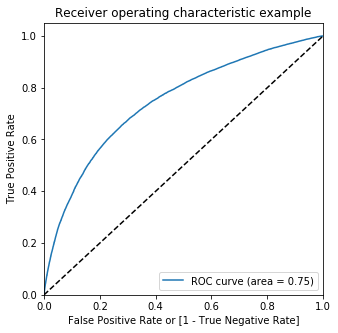

In [67]:
draw_roc( y_train_pred_final.rainfall_tommorow, y_train_pred_final.rainfall_Prob)

##### Since our the area under the ROC curve is 75% we can say that our model is doing a fair job in predicting tommorow's rainfall

### Making predictions on the test set

In [68]:
list_=['WindSpeed3pm','Humidity3pm','Pressure3pm','Temp3pm']

X_test[list_] = scaler.transform(X_test[list_])

C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [69]:
X_test = X_test[col]
X_test.head()

WindSpeed3pm  Pressure3pm  RainToday  Location_Ballarat  \
84799       0.082353       0.6592          0                  0   
48400       0.235294       0.5616          0                  0   
83688       0.023529       0.6304          0                  0   
137493      0.200000       0.4800          0                  0   
130263      0.129412       0.5680          0                  0   

        Location_Darwin  Location_GoldCoast  Location_Katherine  \
84799                 0                   0                   0   
48400                 0                   0                   0   
83688                 0                   0                   0   
137493                1                   0                   0   
130263                0                   0                   0   

        Location_Launceston  Location_NorahHead  Location_Townsville  \
84799                     0                   0                    0   
48400                     0                   0                    0   
83688                     0                   0                    0   
137493                    0                   0                    0   
130263                    1                   0                    0   

        WindDir3pm_N  WindDir3pm_NNW  WindDir3pm_NW  
84799              0               0              0  
48400              0               0              0  
83688              0               0              0  
137493             0               0              1  
130263             0               0              0

In [70]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [71]:
y_test_pred = res.predict(X_test_sm)

In [72]:
y_test_pred[:10]

84799     0.099798
48400     0.162847
83688     0.108422
137493    0.200833
130263    0.105128
77993     0.272149
9986      0.286309
63073     0.107349
62439     0.076407
99030     0.211847
dtype: float64

In [73]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [74]:
# Let's see the head
y_pred_1.head()

0
84799   0.099798
48400   0.162847
83688   0.108422
137493  0.200833
130263  0.105128

In [75]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [76]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [77]:
y_pred_final.head()

RainTomorrow         0
84799              0  0.099798
48400              0  0.162847
83688              1  0.108422
137493             0  0.200833
130263             0  0.105128

In [78]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'rainfall_Prob'})

In [79]:
# Let's see the head of y_pred_final
y_pred_final.head()

RainTomorrow  rainfall_Prob
84799              0       0.099798
48400              0       0.162847
83688              1       0.108422
137493             0       0.200833
130263             0       0.105128

In [80]:
y_pred_final['final_predicted'] = y_pred_final.rainfall_Prob.map(lambda x: 1 if x > 0.19 else 0)

In [81]:
y_pred_final.head()

RainTomorrow  rainfall_Prob  final_predicted
84799              0       0.099798                0
48400              0       0.162847                0
83688              1       0.108422                0
137493             0       0.200833                1
130263             0       0.105128                0

In [82]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.RainTomorrow, y_pred_final.final_predicted)

0.6803131530152751

In [83]:
confusion3 = metrics.confusion_matrix(y_pred_final.RainTomorrow, y_pred_final.final_predicted )
confusion3

array([[17901,  8435],
       [ 2427,  5214]], dtype=int64)

In [84]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [85]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6823714173537495

In [86]:
# Let us calculate specificity
TN / float(TN+FP)

0.6797159781287971

##### We see that the accuracy, sensitivity & specificity on our train data and test data are quite similar, we also saw that the area under the ROC curve was 75% which is also good, so we can say that our model is doing a good job.